# ANALISIS EXPLORATORIO DE LOS DATOS

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

## I. IMPORTAMOS NUESTROS DATOS

### A. IMPORTAMOS LA DATA QUE CONTINE INFORMACION DE CURSOS SOBRE EL AÑO Y EL RATING

#### 1. ANALIZAMOS LOS DATOS:

In [43]:
#Creamos un dataframe
df_coursera1 = pd.read_csv('./Data transformada/coursera/curso_año_rating.csv', sep=',')

In [44]:
#Veamos la información de los datos
df_coursera1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   course_id     2346 non-null   object 
 1   date_reviews  2346 non-null   int64  
 2   rating        2346 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 55.1+ KB


In [45]:
df_coursera1.head()

,course_id,date_reviews,rating
0,aboriginal-education,2017,4.600000
1,aboriginal-education,2018,4.700000
2,aboriginal-education,2019,4.153846
3,aboriginal-education,2020,4.655172
4,access-control-sscp,2018,4.000000


In [46]:
#Quitamos los guiones de los nombres de los cursos
df_coursera1['course_id'] = df_coursera1['course_id'].str.replace('-', ' ')

In [47]:
#Cambiamos a mayúscula la primera letra del nombre de los cursos
df_coursera1['course_id'] = df_coursera1['course_id'].str.capitalize()

In [48]:
#Acortamos a dos decimalos los valores de la columna rating
df_coursera1['rating'] = df_coursera1['rating'].round(2)

In [49]:
#Visualizamos
df_coursera1.head()

,course_id,date_reviews,rating
0,Aboriginal education,2017,4.60
1,Aboriginal education,2018,4.70
2,Aboriginal education,2019,4.15
3,Aboriginal education,2020,4.66
4,Access control sscp,2018,4.00


In [24]:
#Hacemos una descripción de los datos
df_coursera1.describe()

,date_reviews,rating
count,2346.000000,2346.000000
mean,2018.215260,4.638862
std,1.498015,0.350153
min,2015.000000,1.000000
25%,2017.000000,4.550000
50%,2018.000000,4.720000
75%,2020.000000,4.830000
max,2020.000000,5.000000


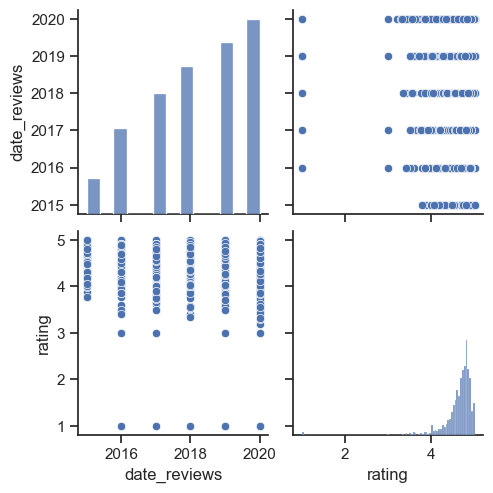

In [29]:
#Veamos graficamente la relación entre las columnas
sns.set(style="ticks")
sns.pairplot(df_coursera1)
plt.show()

In [50]:
#Creamos un dataframe de correlaciones y visualizamos
corr_coursera1 = df_coursera1.corr()
corr_coursera1

C:\Users\Administrador\AppData\Local\Temp\ipykernel_11320\4136528475.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_coursera1 = df_coursera1.corr()


,date_reviews,rating
date_reviews,1.000000,-0.005134
rating,-0.005134,1.000000


In [52]:
#Vamos a crear una columna que contenga el promedio de rating de cada curso en nuestro dataframe
df_coursera1['mean_rating'] = df_coursera1.groupby('course_id')['rating'].transform('mean').round(2)


In [53]:
#Visualizamos
df_coursera1

,course_id,date_reviews,rating,mean_rating
0,Aboriginal education,2017,4.60,4.53
1,Aboriginal education,2018,4.70,4.53
2,Aboriginal education,2019,4.15,4.53
3,Aboriginal education,2020,4.66,4.53
4,Access control sscp,2018,4.00,4.32
...,...,...,...,...
2341,Writing for business,2016,4.89,4.83
2342,Writing for business,2017,4.81,4.83
2343,Writing for business,2018,4.84,4.83
2344,Writing for business,2019,4.77,4.83


In [56]:
#Creamos un dataframe con la columna del nombre del curso y el promedio de valoracion
df_cursmean = df_coursera1[['course_id', 'mean_rating']]

In [65]:
#Visualizamos
df_cursmean.head()

,course_id,mean_rating
0,Aboriginal education,4.53
4,Access control sscp,4.32
7,Accounting analytics,4.39
12,Accounting data analytics python,3.50
13,Actualizacion manejo diabetes tipo 2,4.82


In [58]:
#Eliminamos los duplicados
df_cursmean.drop_duplicates(inplace=True)

C:\Users\Administrador\AppData\Local\Temp\ipykernel_11320\2283110843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cursmean.drop_duplicates(inplace=True)


In [66]:
#Visualizamos
df_cursmean.head()

,course_id,mean_rating
0,Aboriginal education,4.53
4,Access control sscp,4.32
7,Accounting analytics,4.39
12,Accounting data analytics python,3.50
13,Actualizacion manejo diabetes tipo 2,4.82


In [64]:
#Exportamos en un nuevo archivo este dataframe
df_cursmean.to_csv('curso_valoracion.csv', index=False)

In [67]:
#Creamos un dataframe con el nombre del curso y la cantidad de repeticiones 
cant_cursos1 = df_coursera1.groupby('course_id')['date_reviews'].count().reset_index()
cant_cursos1.columns = ['course_id', 'cantidad']

In [68]:
#Visualizamos
cant_cursos1.head()

,course_id,cantidad
0,Aboriginal education,4
1,Access control sscp,3
2,Accounting analytics,5
3,Accounting data analytics python,1
4,Actualizacion manejo diabetes tipo 2,2


In [69]:
#Exportamos en un nuevo archivo este dataframe
cant_cursos1.to_csv('curso_cantidad.csv', index=False)

In [76]:
#Con ambos dataframes obtenidos vamos a crear un nuevo dataframe
df_cur_cant_mean = pd.merge(df_cursmean, cant_cursos1, on='course_id')
df_cur_cant_mean

,course_id,mean_rating,cantidad
0,Aboriginal education,4.53,4
1,Access control sscp,4.32,3
2,Accounting analytics,4.39,5
3,Accounting data analytics python,3.50,1
4,Actualizacion manejo diabetes tipo 2,4.82,2
...,...,...,...
599,Womens health human rights,4.83,4
600,Write a feature length screenplay for film or ...,4.62,1
601,Write your first novel,3.85,1
602,Writing editing words,4.74,1


In [77]:
#Exportamos en un nuevo archivo este dataframe
df_cur_cant_mean.to_csv('curso_promed_cantidad.csv', index=False)

#### 2. PLANTEAMOS ALGUNAS PREGUNTAS:

a. ¿Cuál es el top 5 de cursos con mayor promedio de rating?

In [87]:
curso_max_rating = df_cursmean.nlargest(5, 'mean_rating')
curso_max_rating

,course_id,mean_rating
178,Building modern python applications on aws,5.00
605,Entreprise changement climatique,5.00
1831,Remote team management,5.00
1832,Removing barriers to change,5.00
1266,Legaltech,4.97


b. ¿Cuales son los 5 primeros cursos que más repeticiones tuvieron?

In [79]:
cursos_top_5 = cant_cursos1.nlargest(5, 'cantidad')
cursos_top_5

,course_id,cantidad
5,Addiction and the brain,6
13,American law,6
14,Analytics business metrics,6
15,Analytics excel,6
17,Animal welfare,6


c. ¿De los cursos con mayor cantidad de repeticiones tuvieron cual es el que tuvo la valoracion mas alta?

In [86]:
cursos_top_5_mas_rating = pd.merge(cursos_top_5, df_cur_cant_mean, on='course_id')
cursos_top_5_mas_rating.drop(['cantidad_x', 'cantidad_y'], axis=1, inplace=True)
cursos_top_5_mas_rating.nlargest(1, 'mean_rating')

,course_id,mean_rating
1,American law,4.81


#### 3. CONCLUSIONES:

- Analizando la información de esta podemos ver de que no tuvimos una fuerte relacion entre la fecha y el rating de los cursos, es decir el exito de un curso no tiene relacion con la fecha de lanzamiento.

- Pudimos calcular el top 5 de los cursos con mayor cantidad de repeticiones y mayor valoración y de estas respuestas, podemos llegar a la conclusion de que no hay un area en especifico que sea de mayor preferencia, es decir podemos afirmar de que la variabilidad en la preferencia de los cursos es notoria y eso es saludable para la empresa.

- Debemos aclarar que los años considerados para el analisis de esta información se da entre los años 2015 y 2020.

### B. IMPORTAMOS LA DATA QUE CONTIENE INFORMACION DE CURSOS SOBRE EN EL AÑO 2021

#### 1. ANALIZAMOS LOS DATOS:

In [23]:
#Creamos un dataframe
df_coursera2 = pd.read_csv('./Data transformada/coursera/curso_organizacion_rating_nivel_completo.csv', sep=',')

In [24]:
#Veamos la cantidad de filas y columnas
df_coursera2.shape

(6533, 4)

In [25]:
#Veamos la información de los datos
df_coursera2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6533 entries, 0 to 6532
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_title         6533 non-null   object 
 1   course_organization  6533 non-null   object 
 2   course_rating        6533 non-null   float64
 3   course_difficulty    6533 non-null   object 
dtypes: float64(1), object(3)
memory usage: 204.3+ KB


In [26]:
#Visualizamos
df_coursera2.head()

,course_title,course_organization,course_rating,course_difficulty
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,4.7,Beginner
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,4.7,Intermediate
2,A Crash Course in Data Science,Johns Hopkins University,4.5,Mixed
3,A Law Student's Toolkit,Yale University,4.7,Mixed
4,A Life of Happiness and Fulfillment,Indian School of Business,4.8,Mixed


In [27]:
#Vamos a reemplazar los valores de la dificultad del curso a español
df_coursera2['course_difficulty'] = df_coursera2['course_difficulty'].str.replace('Beginner', 'Principiante')
df_coursera2['course_difficulty'] = df_coursera2['course_difficulty'].str.replace('Intermediate', 'Intermedio')
df_coursera2['course_difficulty'] = df_coursera2['course_difficulty'].str.replace('Advanced', 'Avanzado')
df_coursera2['course_difficulty'] = df_coursera2['course_difficulty'].str.replace('Mixed', 'Mixto')

In [28]:
#Visualizamos
df_coursera2.head()

,course_title,course_organization,course_rating,course_difficulty
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,4.7,Principiante
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,4.7,Intermedio
2,A Crash Course in Data Science,Johns Hopkins University,4.5,Mixto
3,A Law Student's Toolkit,Yale University,4.7,Mixto
4,A Life of Happiness and Fulfillment,Indian School of Business,4.8,Mixto


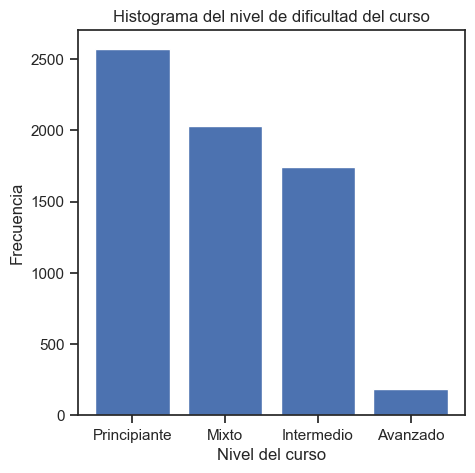

In [29]:
#UTILIZAREMOS UN HISTOGRAMA PARA VISUALIZAR LAS COLUMAS PROXIMIDAD AL OCEANO Y LOCALIDAD
# Contar las ocurrencias de cada categoría en la columna
counts = df_coursera2['course_difficulty'].value_counts()

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(5, 5))

x = range(len(counts))

ax.bar(x, counts)

# Personalizar el gráfico
ax.set_xticks(x)
ax.set_xticklabels(counts.index)
ax.set_xlabel('Nivel del curso')
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma del nivel de dificultad del curso')

plt.show()

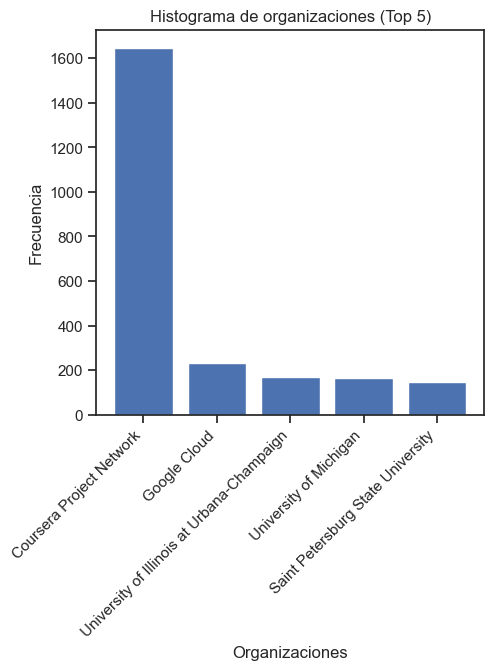

In [30]:
# Contaremos las ocurrencias de cada categoría según la dificultad del curso
counts = df_coursera2['course_organization'].value_counts()

# Obtener solo las primeras 5 categorías
top_5_counts = counts[:5]

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(5, 5))

x = range(len(top_5_counts))

# Ajustar el ancho de las barras
bar_width = 0.8  # Ajusta el valor según tus preferencias
ax.bar(x, top_5_counts, width=bar_width)

# Personalizar el gráfico
ax.set_xticks(x)
ax.set_xticklabels(top_5_counts.index, rotation=45, ha='right')  # Ajustar la rotación y alineación de las etiquetas
ax.set_xlabel('Organizaciones')
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma de organizaciones (Top 5)')

plt.show()


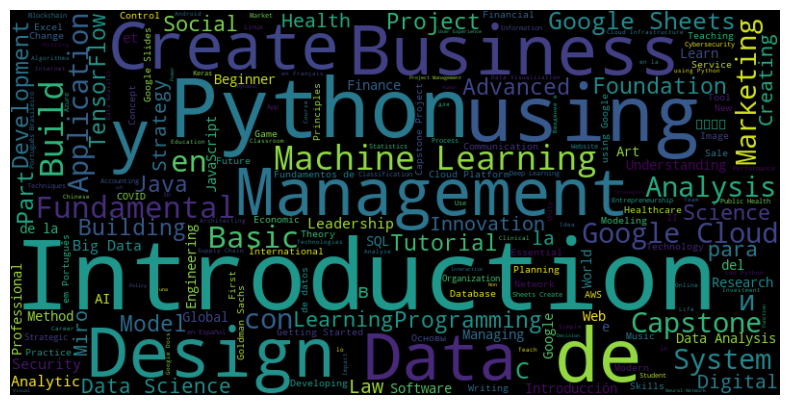

In [87]:
#Veamos que palabras son las más recurrentes en los nombres de los cursos
texto = ' '.join(df_coursera2['course_title'])
stopwords = set(list(STOPWORDS))
wordcloud = WordCloud(width=800, height=400)
wordcloud.generate_from_text(texto)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### 2. PLANTEAMOS ALGUNAS PREGUNTAS:

a. ¿Cuál es el top 5 de los cursos con mayor rating por nivel de dificultad?

In [125]:
# Filtrar los cursos que tienen nivel "principiante"
df_principiante = df_coursera2[df_coursera2['course_difficulty'] == 'Principiante']

# Ordenar los cursos filtrados por rating de forma descendente y obtener los 5 primeros
df_top_5_principiante = df_principiante.sort_values('course_rating', ascending=False).head(5)

# Obtener las columnas requeridas
df_top_5_principiante = df_top_5_principiante[['course_title', 'course_organization', 'course_rating']]

In [122]:
df_top_5_principiante

,course_title,course_organization,course_rating
4745,Plots Creation using Matplotlib Python,Coursera Project Network,5.0
6004,Археология. О чём говорят древности?,Novosibirsk State University,5.0
2955,Exploring ​and ​Preparing ​your ​Data with Big...,Google Cloud,5.0
3458,How Do We Manage Climate Change?,University of Colorado Boulder,5.0
1583,Build a Profile for a Dream Job with Indeed,Coursera Project Network,5.0


In [126]:
# Filtrar los cursos que tienen nivel "intermedio"
df_intermedio = df_coursera2[df_coursera2['course_difficulty'] == 'Intermedio']

# Ordenar los cursos filtrados por rating de forma descendente y obtener los 5 primeros
df_top_5_intermedio = df_intermedio.sort_values('course_rating', ascending=False).head(5)

# Obtener las columnas requeridas
df_top_5_intermedio = df_top_5_intermedio[['course_title', 'course_organization', 'course_rating']]

In [127]:
df_top_5_intermedio

,course_title,course_organization,course_rating
1626,Building Batch Data Pipelines on GCP en Français,Google Cloud,5.0
4703,Perspectivas de música colaborativa,Universidad Nacional Autónoma de México,5.0
1729,C++ Decision Programming,Coursera Project Network,5.0
2501,Data-Driven Testing (via Database) with Seleni...,Coursera Project Network,5.0
4762,Population Health: Syndemics,Universiteit Leiden,5.0


In [128]:
# Filtramos los cursos que tienen nivel "avanzado"
df_avanzado = df_coursera2[df_coursera2['course_difficulty'] == 'Avanzado']

# Ordenamos los cursos filtrados por rating de forma descendente y obtener los 5 primeros
df_top_5_avanzado = df_avanzado.sort_values('course_rating', ascending=False).head(5)

# Obtenemos las columnas requeridas
df_top_5_avanzado = df_top_5_avanzado[['course_title', 'course_organization', 'course_rating']]

In [129]:
#Visualizamos
df_top_5_avanzado

,course_title,course_organization,course_rating
2149,Create Swag Bag Inserts to Market your Busines...,Coursera Project Network,5.0
4484,Modern JavaScript: Iterators and Generators,Coursera Project Network,5.0
2915,"Excel/VBA for Creative Problem Solving, Part 3...",University of Colorado Boulder,4.9
597,Medical Neuroscience,Duke University,4.9
5662,Thoracic Oncology,University of Michigan,4.9


b. ¿Cual es el top 5 de cursos de la organizacion coursera project network?

In [149]:
df_coursera_project = df_coursera2[df_coursera2['course_organization'] == 'Coursera Project Network']
df_top_5_coursera_project = df_coursera_project.sort_values('course_rating', ascending=False).head(5)

In [150]:
df_top_5_coursera_project

,course_title,course_organization,course_rating,course_difficulty
1797,Change Leadership: Strategic Route Analysis wi...,Coursera Project Network,5.0,Intermedio
4228,Linux: I/O Redirection for DevOps,Coursera Project Network,5.0,Intermedio
2306,Create your first custom VPC and its component...,Coursera Project Network,5.0,Principiante
2304,Create your first GUI application in jGRASP us...,Coursera Project Network,5.0,Intermedio
1612,Build an Interactive Worksheet in Google Slides,Coursera Project Network,5.0,Mixto


c. ¿Cuales son los cursos con menores valoraciones en el nivel avanzado?

In [151]:
# Filtramos los cursos que tienen nivel "Avanzado"
df_avanzado_ultimos = df_coursera2[df_coursera2['course_difficulty'] == 'Avanzado']

# Ordenemos los cursos filtrados por rating de forma descendente y obtener los 5 primeros
df_top_5_ultimos_avanzado = df_avanzado_ultimos.sort_values('course_rating', ascending=False).tail(10)

# Obtenemos las columnas requeridas
df_top_5_ultimos_avanzado = df_top_5_ultimos_avanzado[['course_title', 'course_organization', 'course_rating']]

In [152]:
#Visualizamos
df_top_5_ultimos_avanzado

,course_title,course_organization,course_rating
1644,Building Recommendation System Using MXNET on ...,Coursera Project Network,3.0
1845,Clasificación de datos de Satélites con autoML...,Coursera Project Network,3.0
2052,Corporate Entrepreneurship,Tecnológico de Monterrey,2.9
2587,Design and innovation of business model,Tecnológico de Monterrey,2.9
2486,Data Science for Business with R Programming,Coursera Community Project Network,2.6
4273,Machine Learning con Spark (MLlib) en Databricks,Coursera Project Network,2.6
3132,Fundamentals of entrepreneurship in the family...,Tecnológico de Monterrey,2.5
4743,Play with Graphs using Wolfram Mathematica,Coursera Project Network,2.5
1280,Apprendre à une IA des jeux de stratégie avec ...,Coursera Project Network,2.2
4205,Liderazgo en la empresa familiar,Tecnológico de Monterrey,2.0


#### 3. CONCLUSIONES

- Vemos que la dificultad de los cursos en su mayoria son de nivel principiante, intermedio y avanzado en ese orden.

- La organizacion con mayor cantidad de cursos ofrecidos corresponde a la de la empresa Coursera Project Networks.

- De lo visto en el top 5 de cursos con mayor valoracion por dificultad, vemos que son los cursos ligados a la tecnologia los que más preferencia se tiene por parte de los estudiantes.

- El top 5 de cursos con mayor valoracion en los tres niveles para la empresa Coursera Project Network estan en el area de la tecnologia.

- Los cursos menos valorados en el nivel avanzado en su mayoria tambien corresponden al area de la tecnologia.

### C. IMPORTAMOS LA DATA QUE CONTIENE INFORMACION DE CURSOS SOBRE EN EL AÑO 2021 Y LA CANTIDAD DE ESTUDIANTES

OBS: Una característica de esta data es que es mas pequeña que la data anterior es que la mayoria de organizaciones que imparten cursos a traves de los servicios de Coursera es que son universidades, ademas de que esta data si nos provee informacion acerca de la cantidad de estudiantes y el tipo de curso ofrecido.

#### 1. ANALIZAMOS LOS DATOS:

In [3]:
#Creamos un dataframe
df_coursera3 = pd.read_csv('./Data transformada/coursera/completo_cant_estudiantes_800.csv', sep=',')

In [4]:
#Veamos la cantidad de filas y columnas
df_coursera3.shape

(891, 6)

In [5]:
#Veamos la informacion de los datos
df_coursera3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   course_title              891 non-null    object 
 1   course_organization       891 non-null    object 
 2   course_Certificate_type   891 non-null    object 
 3   course_rating             891 non-null    float64
 4   course_difficulty         891 non-null    object 
 5   course_students_enrolled  891 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 41.9+ KB


In [ ]:
#Vemos que los valores de la dificultad del curso estan en ingles, por lo que cambiaremos a español
df_coursera3['course_difficulty'].value_counts()

In [7]:
#Vamos a reemplazar los valores de la dificultad del curso a español
df_coursera3['course_difficulty'] = df_coursera3['course_difficulty'].str.replace('Beginner', 'Principiante')
df_coursera3['course_difficulty'] = df_coursera3['course_difficulty'].str.replace('Intermediate', 'Intermedio')
df_coursera3['course_difficulty'] = df_coursera3['course_difficulty'].str.replace('Advanced', 'Avanzado')
df_coursera3['course_difficulty'] = df_coursera3['course_difficulty'].str.replace('Mixed', 'Mixto')

In [9]:
#Veamos los valores de la columna del tipo de curso
df_coursera3['course_Certificate_type'].value_counts()

Course                      582
Specialization              297
Professional certificate     12
Name: course_Certificate_type, dtype: int64

In [10]:
#Vamos a reemplazar los valores del tipo del curso a español
df_coursera3['course_Certificate_type'] = df_coursera3['course_Certificate_type'].str.replace('Course', 'Curso')
df_coursera3['course_Certificate_type'] = df_coursera3['course_Certificate_type'].str.replace('Specialization', 'Especializacion')
df_coursera3['course_Certificate_type'] = df_coursera3['course_Certificate_type'].str.replace('Professional certificate', 'Certificacion profesional')

In [13]:
#Visualizamos
df_coursera3.head(3)

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,Especializacion,4.7,Principiante,5300
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,Curso,4.7,Intermedio,17000
2,A Crash Course in Data Science,Johns Hopkins University,Curso,4.5,Mixto,130000


In [15]:
df_coursera3.describe().round(2)

,course_rating,course_students_enrolled
count,891.00,891.00
mean,4.68,90552.08
std,0.16,181936.45
min,3.30,1500.00
25%,4.60,17500.00
50%,4.70,42000.00
75%,4.80,99500.00
max,5.00,3200000.00


In [17]:
corr_coursera3 = df_coursera3.corr()
corr_coursera3

C:\Users\Administrador\AppData\Local\Temp\ipykernel_15336\1047635386.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_coursera3 = df_coursera3.corr()


,course_rating,course_students_enrolled
course_rating,1.00000,0.07109
course_students_enrolled,0.07109,1.00000


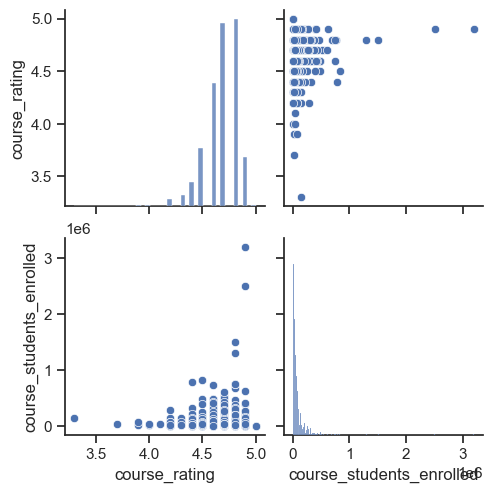

In [18]:
#Veamos graficamente la relación entre las columnas
sns.set(style="ticks")
sns.pairplot(df_coursera3)
plt.show()

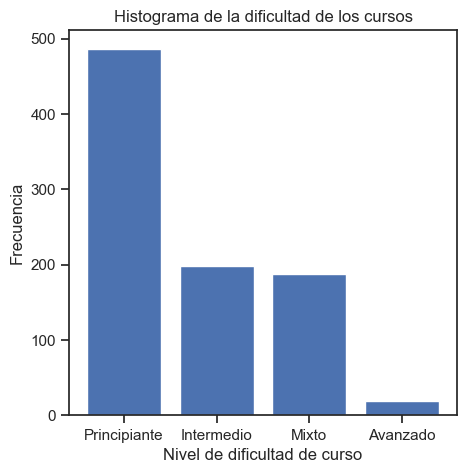

In [32]:
#Contar las ocurrencias de cada categoría en la columna
counts = df_coursera3['course_difficulty'].value_counts()

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(5, 5))

x = range(len(counts))

ax.bar(x, counts)

# Personalizar el gráfico
ax.set_xticks(x)
ax.set_xticklabels(counts.index)
ax.set_xlabel('Nivel de dificultad de curso')
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma de la dificultad de los cursos')

plt.show()

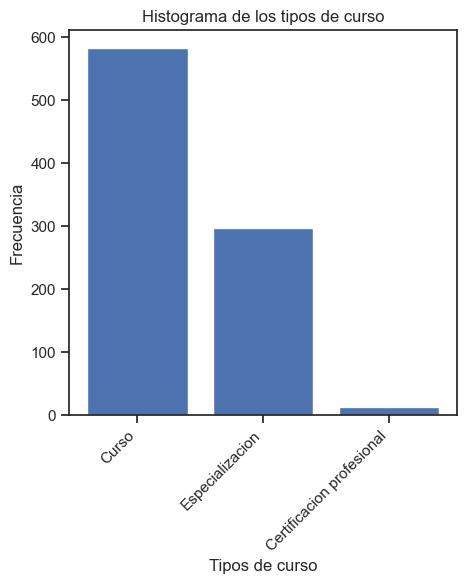

In [35]:
# Contar las ocurrencias de cada categoría en la columna
counts = df_coursera3['course_Certificate_type'].value_counts()

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(5, 5))

x = range(len(counts))

ax.bar(x, counts)

# Personalizar el gráfico
ax.set_xticks(x)
ax.set_xticklabels(counts.index)
ax.set_xticklabels(counts.index, rotation=45, ha='right')
ax.set_xlabel('Tipos de curso')
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma de los tipos de curso')

plt.show()

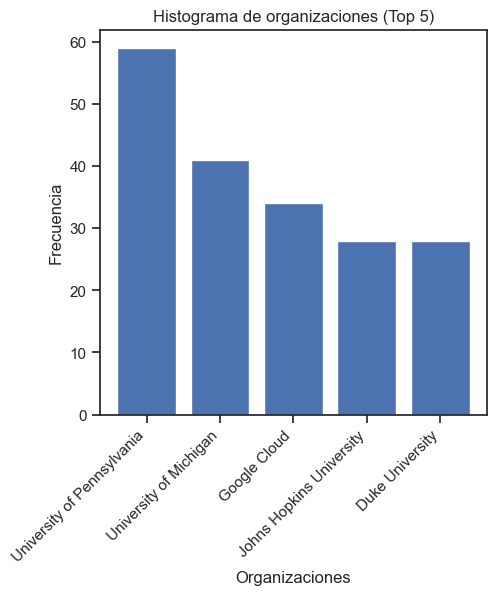

In [31]:
# Contaremos las ocurrencias de cada categoría según la dificultad del curso
counts = df_coursera3['course_organization'].value_counts()

# Obtener solo las primeras 5 categorías
top_5_counts = counts[:5]

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(5, 5))

x = range(len(top_5_counts))

# Ajustar el ancho de las barras
bar_width = 0.8  # Ajusta el valor según tus preferencias
ax.bar(x, top_5_counts, width=bar_width)

# Personalizar el gráfico
ax.set_xticks(x)
ax.set_xticklabels(top_5_counts.index, rotation=45, ha='right')  # Ajustar la rotación y alineación de las etiquetas
ax.set_xlabel('Organizaciones')
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma de organizaciones (Top 5)')

plt.show()

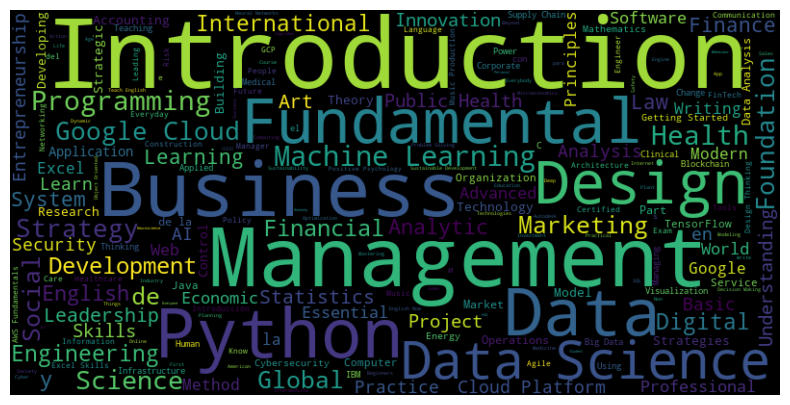

In [85]:
#Veamos que palabras son las más recurrentes en los nombres de los cursos
texto = ' '.join(df_coursera3['course_title'])
stopwords = set(list(STOPWORDS))
wordcloud = WordCloud(width=800, height=400)
wordcloud.generate_from_text(texto)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [20]:
df_coursera3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   course_title              891 non-null    object 
 1   course_organization       891 non-null    object 
 2   course_Certificate_type   891 non-null    object 
 3   course_rating             891 non-null    float64
 4   course_difficulty         891 non-null    object 
 5   course_students_enrolled  891 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 41.9+ KB


In [40]:
df_coursera3.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,Especializacion,4.7,Principiante,5300
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,Curso,4.7,Intermedio,17000
2,A Crash Course in Data Science,Johns Hopkins University,Curso,4.5,Mixto,130000
3,A Law Student's Toolkit,Yale University,Curso,4.7,Mixto,91000
4,A Life of Happiness and Fulfillment,Indian School of Business,Curso,4.8,Mixto,320000


#### 2. PLANTEAMOS ALGUNAS PREGUNTAS:

a. ¿Cuantos alumnos en total hay inscritos en cursos de nivel principiante, intermedio, avanzado y mixto por cada nivel?

In [52]:
#Calculamos la cantidad de inscritos en cursos de nivel principiante
cant_inscritos1 = df_coursera3[df_coursera3['course_difficulty'] == 'Principiante']
cant_inscritos_principiantes = cant_inscritos1['course_students_enrolled'].sum()
cant_inscritos_principiantes

39921800

In [53]:
#Calculamos la cantidad de inscritos en cursos de nivel intermedio
cant_inscritos2 = df_coursera3[df_coursera3['course_difficulty'] == 'Intermedio']
cant_inscritos_intermedio = cant_inscritos2['course_students_enrolled'].sum()
cant_inscritos_intermedio

14506300

In [54]:
#Calculamos la cantidad de inscritos en cursos de nivel avanzado
cant_inscritos3 = df_coursera3[df_coursera3['course_difficulty'] == 'Avanzado']
cant_inscritos_avanzado = cant_inscritos3['course_students_enrolled'].sum()
cant_inscritos_avanzado

1264400

In [55]:
#Calculamos la cantidad de inscritos en cursos de nivel mixto
cant_inscritos4 = df_coursera3[df_coursera3['course_difficulty'] == 'Mixto']
cant_inscritos_avanzado = cant_inscritos4['course_students_enrolled'].sum()
cant_inscritos_avanzado

24989400

b. En el caso de los cursos de nivel avanzado en su mayoria son especializaciones?

In [59]:
#Veamos la cantidad de especializaciones
cant_inscritos3['course_Certificate_type'].value_counts()

Especializacion    10
Curso               9
Name: course_Certificate_type, dtype: int64

Rpta: Si, de los 19 cursos de nivel avanzado vemos que 10 son especializaciones.

c. ¿Cuál es la universidad que ofrece mayor cantidad de cursos de especializacion?

In [78]:
df_especializacion = df_coursera3[df_coursera3['course_Certificate_type'] == 'Especializacion']
organizacion_cursos = df_especializacion.groupby('course_organization')['course_title'].count().reset_index()
organizacion_cursos.rename(columns={'course_title': 'cantidad_cursos'}, inplace=True)
organizacion_cursos = organizacion_cursos.sort_values('cantidad_cursos', ascending=False)

In [89]:
organizacion_cursos.head()

,course_organization,cantidad_cursos
80,University of Pennsylvania,15
22,Google Cloud,15
71,"University of California, Irvine",14
75,University of Illinois at Urbana-Champaign,12
78,University of Michigan,11


Rpta: La universidad que ofrece mayor cantidad de cursos de especializacion es la universidad de Pensilvania.

#### 3. CONCLUSIONES

- La mayor cantidad de cursos son de nivel principiante.

- Las universidades de Pensilvania y Michigan son las que mas cursos ofrecen.

- La mayor cantidad de cursos estan relacionados a las areas de tecnologia y negocios.

- La mayor cantidad de cursos ofrecidos son de tipo curso, y la segunda modalidad son de especializacion, se observan muy pocos programas de certificacion profesional.

- Los cursos de dificultad principiante y mixto tuvieron la mayor cantidad de alumnos inscritos.

- Los cursos de nivel avanzado no son de certificacion profesional.

- Son universidades de EEUU las que en su mayoria se dedican a ofrecer cursos de especializacion.